In [49]:
import pandas as pd

Import SO data

In [50]:
df = pd.read_csv('C:/Users/jamesal/OneDrive - UNC-Wilmington/Python/Codes/UNCW Peer 2025 Dataset_2024_1218.csv')
df

In [52]:
#create a copy of main data for cleaning and manipulation
df1=df.copy()
#df1

Correlation Matrix

In [53]:
# form correlation matrix
df.drop(['year','level5','instnm', 'unitid', 'control_desc', 'f1sysnam'], axis=1, inplace=True)
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                       control   hloffer      hbcu  hospital   medical  \
control               1.000000  0.037673  0.050452  0.070865  0.137120   
hloffer               0.037673  1.000000  0.020064  0.040215 -0.107538   
hbcu                  0.050452  0.020064  1.000000 -0.050023 -0.022116   
hospital              0.070865  0.040215 -0.050023  1.000000  0.511578   
medical               0.137120 -0.107538 -0.022116  0.511578  1.000000   
...                        ...       ...       ...       ...       ...   
arts_deg_pct          0.062739 -0.048062  0.029315  0.033317  0.052002   
doc_pct               0.126666  0.366358  0.024665 -0.059097 -0.324930   
stem_grad_pct        -0.229891  0.107470 -0.002582 -0.070288 -0.202772   
crim_bus_stem_ug_pct -0.100043  0.171485 -0.081522 -0.004215 -0.125249   
as_deg_pct           -0.115841 -0.330095 -0.031703  0.067966  0.061691   

                        tribal  f1systyp  c21basic   c21ipug  c21ipgrd  ...  \
control

In [54]:
# Filter the correlation matrix to show only values greater than 0.8
high_corr = matrix[(matrix > 0.8) & (matrix != 1.0)]
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))
#high_corr

                   fteug     ftegd  ftedpp  tot_student_fte  fte_ug_pct  \
fteug                NaN       NaN     NaN         0.979180         NaN   
ftegd                NaN       NaN     NaN         0.853546         NaN   
ftedpp               NaN       NaN     NaN              NaN         NaN   
tot_student_fte  0.97918  0.853546     NaN              NaN         NaN   
fte_ug_pct           NaN       NaN     NaN              NaN         NaN   
...                  ...       ...     ...              ...         ...   
stem_pct             NaN       NaN     NaN              NaN         NaN   
ehb_pct              NaN       NaN     NaN              NaN         NaN   
Bus_Health_Pct       NaN       NaN     NaN              NaN         NaN   
Health_Pct           NaN       NaN     NaN              NaN         NaN   
stem_grad_pct        NaN       NaN     NaN              NaN         NaN   

                 fteug_year_minus_5  ftegd_year_minus_5  ftedpp_year_minus_5  \
fteug              

In [55]:
# Filter the correlation matrix to show only values less than -0.8
high_neg_corr = matrix[(matrix < -0.8) & (matrix != 1.0)]
print(high_neg_corr.dropna(how='all').dropna(axis=1, how='all'))

                                  control  state_appropriations_per_fte_log
control                               NaN                          -0.90986
state_appropriations_per_fte_log -0.90986                               NaN


Import collegescorecard data

In [57]:
df2 = pd.read_csv('C:/Users/jamesal/OneDrive - UNC-Wilmington/Peer study/Most-Recent-Cohorts-Institution.csv')
#df2

C:\Users\jamesal\AppData\Local\Temp\ipykernel_19648\3276276597.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1690,1692,1697,1700,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('C:/Users/jamesal/OneDrive - UNC-Wilmington/Peer study/Most-Recent-Cohorts-Institution.csv')


Join collegescorecard data and df1(SO clean data) for admission rate

In [58]:
df3 = df1.set_index('unitid').join(df2.set_index('UNITID'))
#df3

Cleaning steps 

In [59]:
# Filter rows based on column: 'control_desc'
df4 = df3[df3['control_desc'] == "Public"]
#df4

In [60]:
# drop rows with missing value of column: 'fteug' to remove schools that do not offer bachelors degree
df4 = df4[df4['fteug'].notna()]
#df4

Check summary for the academic mix

In [61]:
acad_mix = ['ug_finaid_cohort','student_serv_exp_per_fte_log','ADM_RATE','ft_ug_tot_fe','avg_full_prof_salary','stem_pct','ehb_pct','Bus_Health_Pct','Health_Pct','Critical_Wrk_Pct','arts_deg_pct','crim_bus_stem_ug_pct','doc_pct','stem_grad_pct']
#Keep only 'instnm' = "University of North Carolina Wilmington"
y = df4[df4['instnm'] == "University of North Carolina Wilmington"]
y= y[acad_mix]
y


,ug_finaid_cohort,student_serv_exp_per_fte_log,ADM_RATE,ft_ug_tot_fe,avg_full_prof_salary,stem_pct,ehb_pct,Bus_Health_Pct,Health_Pct,Critical_Wrk_Pct,arts_deg_pct,crim_bus_stem_ug_pct,doc_pct,stem_grad_pct
unitid,,,,,,,,,,,,,,
199218,14488.0,7.119594,0.6883,11923.0,108692.0,0.159515,0.544696,0.475368,0.256655,0.481327,0.029201,0.338344,0.006754,0.165818


In [62]:
x = df4[acad_mix]
x.describe()

,ug_finaid_cohort,student_serv_exp_per_fte_log,ADM_RATE,ft_ug_tot_fe,avg_full_prof_salary,stem_pct,ehb_pct,Bus_Health_Pct,Health_Pct,Critical_Wrk_Pct,arts_deg_pct,crim_bus_stem_ug_pct,doc_pct,stem_grad_pct
count,786.000000,757.000000,549.000000,790.000000,778.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,784.000000,785.000000,538.000000
mean,9626.131043,7.765043,0.774645,6718.592405,91221.012853,0.199070,0.400836,0.317602,0.158080,0.439115,0.029445,0.286844,0.029408,0.186676
std,10458.561519,0.596556,0.188689,8233.396111,44766.566677,0.155496,0.179441,0.169644,0.172883,0.179446,0.072990,0.165911,0.068879,0.203552
min,27.000000,5.850802,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2408.500000,7.371284,0.697600,1401.500000,75571.500000,0.092379,0.300173,0.214278,0.052957,0.329747,0.002865,0.182383,0.000000,0.042151
50%,5947.000000,7.748691,0.826900,3590.000000,94291.500000,0.159515,0.387947,0.295981,0.119059,0.428256,0.018945,0.272800,0.000000,0.129961
75%,12444.750000,8.136249,0.913900,8262.000000,116827.000000,0.255409,0.490623,0.385837,0.201561,0.525738,0.035523,0.374910,0.030762,0.263519
max,69168.000000,10.498523,1.000000,59884.000000,248620.000000,0.998377,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.684015,1.000000


In [64]:
#creating a variable fields to include institution name and 10 selected variables and dropping rest of the fields
#run9
# fields = ['instnm','tot_student_fte','ug_pell_pct','fte_ug_pct','ehb_pct','inst_staff_ft_pct','instruct_exp_per_fte'
#               ,'stu_fte_5yr_pct_change','avg_full_prof_salary','core_op_revenue_per_fte_log','ug_new_pct_transfer_fe'
# ]
#run 10
# fields = ['instnm','tot_student_fte','ug_pell_pct','fte_ug_pct','ehb_pct','inst_staff_ft_pct','instruct_exp_per_fte'
#               ,'stu_fte_5yr_pct_change','core_op_revenue_per_fte_log','endowment_eoy_per_fte_log','ug_new_pct_transfer_fe'
# ]

#run 14
fields = ['instnm','tot_student_fte','ug_pell_pct','fte_ug_pct','Critical_Wrk_Pct','inst_staff_ft_pct','instruct_exp_per_fte'
              ,'stem_grad_pct','ADM_RATE','core_op_revenue_per_fte_log','student_serv_exp_per_fte_log'
]

df5 = df4[fields]
#df5

In [65]:
#Drop any row with any missing value in the selected 10 fields
df6 = df5.dropna()
#df6

In [67]:
df7 = df6.copy() #redundant may be remove later

# features = ['tot_student_fte','ug_pell_pct','fte_ug_pct','ehb_pct','inst_staff_ft_pct','instruct_exp_per_fte'
#               ,'stu_fte_5yr_pct_change','research_exp_per_fte','ADM_RATE','ug_new_pct_transfer_fe'
# ]
features = ['tot_student_fte','ug_pell_pct','fte_ug_pct','Critical_Wrk_Pct','inst_staff_ft_pct','instruct_exp_per_fte'
              ,'stem_grad_pct','ADM_RATE','core_op_revenue_per_fte_log','student_serv_exp_per_fte_log'
]

df8 = df6[features]
#df8


Scale the features

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df8)
scaled_features = pd.DataFrame(scaled_features, columns=df8.columns)
# scaled_features.head()
# scaled_features = scaled_features.dropna()
#scaled_features


Elbow method to find the optimal number of clusters

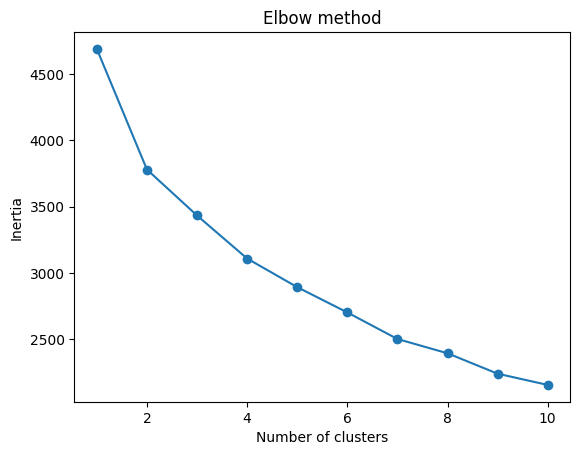

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(
        init="random",
        # n_clusters=2,
        n_init=25,
        max_iter=300,
        n_clusters=i,
        random_state=42
   )
    # kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

silhouette_score for optimal clusters


https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 20, 25, 30, 35,40,50,55,60]

for n_clusters in range_n_clusters:
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df8)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df8, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df8, cluster_labels)

   
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

For n_clusters = 2 The average silhouette_score is : 0.6431172435809089
For n_clusters = 3 The average silhouette_score is : 0.5496863668535834
For n_clusters = 20 The average silhouette_score is : 0.32333615735414517
For n_clusters = 25 The average silhouette_score is : 0.3456280442231143
For n_clusters = 30 The average silhouette_score is : 0.34266820494600664
For n_clusters = 35 The average silhouette_score is : 0.34752075823871453
For n_clusters = 40 The average silhouette_score is : 0.3529408029454849
For n_clusters = 50 The average silhouette_score is : 0.3604595134740985
For n_clusters = 55 The average silhouette_score is : 0.3696632377772236
For n_clusters = 60 The average silhouette_score is : 0.3443085665128662


TEST number of clusters is equal to number of institutions and calculate the euclidean disteance between the insts to weed out the ones that are fathest from UNCW

In [294]:
# kmeans = KMeans(
#         init="random",
#         n_clusters=395,
#         n_init=30,
#         max_iter=300,
#         random_state=42
#    )
# kmeans.fit(scaled_features)
# #add labels to the data
# df7['label']= kmeans.labels_
# df7['label'].value_counts()
# #df7

In [295]:
# from sklearn.metrics.pairwise import euclidean_distances
# dists = euclidean_distances(kmeans.cluster_centers_)
# dists

In [296]:
# import numpy as np
# tri_dists = dists[np.triu_indices(395)]
# max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
# print(max_dist, avg_dist, min_dist)
# tri_dists.sort()
# tri_dists

KMeans Clustering (first go to remove outliers)

In [72]:
kmeans = KMeans(
        init="random",
        n_clusters= 30,  #50 for run 10, #30 for run 9, #55 for run12
        n_init=30,
        max_iter=300,
        random_state=42
   )
kmeans.fit(scaled_features)
#add labels to the data
df7['label']= kmeans.labels_
df7['label'].value_counts()
#df7

label
17    32
24    30
22    29
12    28
9     25
26    25
18    24
13    21
29    18
14    18
25    17
27    16
6     16
8     16
7     15
10    15
3     15
28    13
21    13
16    13
5     12
23    11
11    11
20     9
4      9
15     8
1      6
0      2
2      1
19     1
Name: count, dtype: int64

In [73]:
# Filter rows based on column: 'instnm'
Wilm_label = df7[df7['instnm'].str.contains("Wilmington", regex=False, na=False, case=False)]
Wilm_label

,instnm,tot_student_fte,ug_pell_pct,fte_ug_pct,Critical_Wrk_Pct,inst_staff_ft_pct,instruct_exp_per_fte,stem_grad_pct,ADM_RATE,core_op_revenue_per_fte_log,student_serv_exp_per_fte_log,label
unitid,,,,,,,,,,,,
199218,University of North Carolina Wilmington,16009.0,25.0,83.96527,0.481327,67.022222,9499.863139,0.165818,0.6883,9.86133,7.119594,13


Calculating distance between centroids

In [74]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_)
dists

array([[ 0.        ,  9.03938159,  9.37986649,  9.46023175, 10.19651757,
        10.60249948,  9.98458681,  6.58927781,  8.448587  , 10.30031019,
        10.01161839,  7.27598424, 10.30185215,  9.67153131,  8.80791967,
        10.21409677,  8.51767691, 10.29161064, 10.10803575, 20.99958616,
         8.85653204,  9.85034527, 10.79655177,  9.96939476,  9.24612066,
         9.99970143,  9.40421749, 10.07859663, 10.36387772,  9.53734792],
       [ 9.03938159,  0.        ,  8.42182254,  2.95631514,  4.66828577,
         3.59699058,  4.2861663 ,  6.29256605,  4.99273333,  3.98001417,
         3.41121054,  3.70911421,  3.44365484,  3.52803863,  3.16407511,
         3.84080445,  5.5056168 ,  3.83191909,  2.7415906 , 18.67545105,
         4.10008644,  4.29386503,  4.24347806,  3.32544   ,  3.53988239,
         2.70651839,  4.61990114,  4.01662407,  4.0311149 ,  6.42588153],
       [ 9.37986649,  8.42182254,  0.        ,  8.33853223,  7.77867419,
         9.1227058 ,  7.16141521,  5.02600315,  6

Filter based on centroid distance

In [75]:
import numpy as np
centroids = kmeans.cluster_centers_

# Calculate distance from each centroid to the centroid of cluster 18 ***has to be changed based on UNCW cluster***
distances = np.linalg.norm(centroids - centroids[13], axis=1)

# Filter out clusters whose distance is more than 2 ***will change based on cluster distribution***
clusters_to_keep = np.where(distances <= 2.1)[0]

# Create a mask to filter the data points belonging to the clusters to keep
mask = np.isin(kmeans.labels_, clusters_to_keep)

# Filter the data
filtered_data = df7[mask]
filtered_data


,instnm,tot_student_fte,ug_pell_pct,fte_ug_pct,Critical_Wrk_Pct,inst_staff_ft_pct,instruct_exp_per_fte,stem_grad_pct,ADM_RATE,core_op_revenue_per_fte_log,student_serv_exp_per_fte_log,label
unitid,,,,,,,,,,,,
100706,University of Alabama in Huntsville,8200.0,22.0,83.500000,0.661047,63.587922,8733.240976,0.458730,0.7810,9.700447,7.945091,24
100751,The University of Alabama,34949.0,18.0,84.800710,0.330292,77.069133,8922.652694,0.151398,0.8006,9.875938,7.651337,21
100830,Auburn University at Montgomery,4707.0,46.0,80.093478,0.469681,68.656716,7938.006373,0.219269,0.9223,9.777063,7.683102,12
101879,University of North Alabama,6905.0,29.0,74.496741,0.385460,52.641166,8349.307169,0.012563,0.9568,9.630423,7.740430,25
102094,University of South Alabama,13674.0,39.0,63.149042,0.753105,67.744610,10862.878460,0.053501,0.6536,9.895801,8.239572,24
...,...,...,...,...,...,...,...,...,...,...,...,...
476975,Colorado State University Global,7254.0,26.0,67.741935,0.354081,7.181329,2648.010063,0.172459,0.9688,9.245613,8.214288,25
482158,Middle Georgia State University,6262.0,42.0,94.985628,0.538462,62.500000,6540.810125,0.424390,0.9971,9.348819,7.513338,9
482680,University of North Georgia,15203.0,28.0,95.908702,0.354088,75.825346,5581.330658,0.000000,0.6963,9.319034,6.894146,22


Calculating silhouette_score to measure the cluster performance (The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.)

In [76]:
from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(df8, labels, metric='euclidean')

np.float64(-0.2987851396387798)

Evaluating using calinski_harabasz_score

In [77]:
metrics.calinski_harabasz_score(df8, labels)

np.float64(44.45233163806318)

In [78]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df8, labels)

np.float64(9.185993695262772)

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 20, 25, 30, 35]

for n_clusters in range_n_clusters:
    

    # Initialize the cluster with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    cluster = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster.fit_predict(df8)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    calinski_harabasz_avg = metrics.calinski_harabasz_score(df8, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # # Compute the silhouette scores for each sample
    # sample_silhouette_values = silhouette_samples(df8, cluster_labels)

   
    # for i in range(n_clusters):
    #     # Aggregate the silhouette scores for samples belonging to
    #     # cluster i, and sort them
    #     ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    #     ith_cluster_silhouette_values.sort()

For n_clusters = 2 The average silhouette_score is : 0.3443085665128662
For n_clusters = 3 The average silhouette_score is : 0.3443085665128662
For n_clusters = 20 The average silhouette_score is : 0.3443085665128662
For n_clusters = 25 The average silhouette_score is : 0.3443085665128662
For n_clusters = 30 The average silhouette_score is : 0.3443085665128662
For n_clusters = 35 The average silhouette_score is : 0.3443085665128662


Drop rows of inst that are in clusters less than 17

In [ ]:
# filtered_data = df7[df7['label'].map(df7['label'].value_counts()) >= 17]
# filtered_data['label'].value_counts()

In [81]:
# Drop the 'label' column from the dataframe
df9 = filtered_data.drop('label', axis=1)
df10 = df9.drop('instnm', axis=1)
df10

,tot_student_fte,ug_pell_pct,fte_ug_pct,Critical_Wrk_Pct,inst_staff_ft_pct,instruct_exp_per_fte,stem_grad_pct,ADM_RATE,core_op_revenue_per_fte_log,student_serv_exp_per_fte_log
unitid,,,,,,,,,,
100706,8200.0,22.0,83.500000,0.661047,63.587922,8733.240976,0.458730,0.7810,9.700447,7.945091
100751,34949.0,18.0,84.800710,0.330292,77.069133,8922.652694,0.151398,0.8006,9.875938,7.651337
100830,4707.0,46.0,80.093478,0.469681,68.656716,7938.006373,0.219269,0.9223,9.777063,7.683102
101879,6905.0,29.0,74.496741,0.385460,52.641166,8349.307169,0.012563,0.9568,9.630423,7.740430
102094,13674.0,39.0,63.149042,0.753105,67.744610,10862.878460,0.053501,0.6536,9.895801,8.239572
...,...,...,...,...,...,...,...,...,...,...
476975,7254.0,26.0,67.741935,0.354081,7.181329,2648.010063,0.172459,0.9688,9.245613,8.214288
482158,6262.0,42.0,94.985628,0.538462,62.500000,6540.810125,0.424390,0.9971,9.348819,7.513338
482680,15203.0,28.0,95.908702,0.354088,75.825346,5581.330658,0.000000,0.6963,9.319034,6.894146


In [82]:
scaler1 = StandardScaler()
scaled_features1 = scaler.fit_transform(df10)
scaled_features1 = pd.DataFrame(scaled_features1, columns=df10.columns)
scaled_features1

,tot_student_fte,ug_pell_pct,fte_ug_pct,Critical_Wrk_Pct,inst_staff_ft_pct,instruct_exp_per_fte,stem_grad_pct,ADM_RATE,core_op_revenue_per_fte_log,student_serv_exp_per_fte_log
0,-0.504673,-1.026150,0.087516,1.982703,-0.132667,-0.419424,2.090214,-0.626343,0.080690,1.046556
1,2.959337,-1.455568,0.270213,-1.468094,0.916301,-0.353050,-0.169471,-0.434049,0.750738,0.311570
2,-0.957019,1.550360,-0.390962,-0.013832,0.261734,-0.698090,0.329560,0.759939,0.373223,0.391048
3,-0.672376,-0.274668,-1.177077,-0.892518,-0.984430,-0.553962,-1.190263,1.098415,-0.186670,0.534485
4,0.204213,0.798878,-2.770970,2.943148,0.190763,0.326844,-0.889264,-1.876253,0.826579,1.783362
...,...,...,...,...,...,...,...,...,...,...
183,-0.627181,-0.596732,-2.125854,-1.219900,-4.521643,-2.551809,-0.014615,1.216146,-1.655925,1.720099
184,-0.755645,1.120942,1.700782,0.703758,-0.217318,-1.187695,1.837727,1.493795,-1.261868,-0.033710
185,0.402219,-0.382022,1.830437,-1.219827,0.819522,-1.523916,-1.282631,-1.457327,-1.375592,-1.582956
186,-0.759012,-0.274668,1.314938,2.462482,-0.834602,0.003555,0.889204,-1.144359,0.071516,1.168722


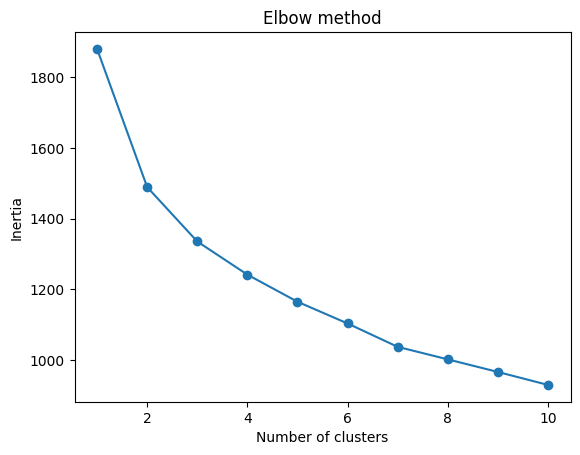

In [83]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(
        init="random",
        # n_clusters=2,
        n_init=25,
        max_iter=300,
        n_clusters=i,
        random_state=42
   )
    # kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_features1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [84]:
kmeans1 = KMeans(
        init="random",
        n_clusters= 8, #10 for run10 and 12
        n_init=30,
        max_iter=300,
        random_state=42
   )
kmeans1.fit(scaled_features1)
#add labels to the data
df9['label']= kmeans1.labels_
df9['label'].value_counts()
#df9

label
3    34
0    30
5    29
7    22
6    21
1    21
2    20
4    11
Name: count, dtype: int64

In [85]:
kmeans1.inertia_

1001.4312629161742

Silhouette score

In [46]:
labels = kmeans1.labels_
metrics.silhouette_score(df10, labels, metric='euclidean')

np.float64(-0.10921722238846696)

In [47]:
import pathlib

# current working directory
print(pathlib.Path().absolute())

c:\Users\jamesal\OneDrive - UNC-Wilmington\Python\Codes


In [86]:
import openpyxl

datatoexcel = pd.ExcelWriter('peer_study_run15.xlsx')
df9.to_excel(datatoexcel)
# save the excel
datatoexcel.close()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [102]:
kmeans.cluster_centers_

array([[-7.36884482e-01,  2.56731094e+00,  9.61415780e-01,
        -1.00294617e-01,  2.16367405e-01, -4.60627310e-01,
        -1.04442595e+00, -3.04728584e-01, -2.34399555e-01,
        -1.28170748e+00],
       [-4.46362387e-01,  5.63297677e-01,  4.42191974e-01,
        -1.29051426e-01, -1.44437258e-01, -7.14753946e-01,
         1.88845193e+00, -4.23718811e-01,  3.91694117e-01,
         7.70832135e-01],
       [-6.56282282e-01, -4.00408531e-01,  1.01961556e+00,
        -6.45548471e-01,  5.85470085e-01, -2.23102922e-01,
        -4.28960230e-01, -3.30831318e-01,  3.52236242e-01,
        -5.72703947e-01],
       [-8.25269282e-01,  1.05226640e+00,  1.38429062e+00,
         9.99476795e-01, -1.20688811e+00, -6.98820167e-01,
        -1.17393975e+00, -4.37468630e-01,  1.07191342e+00,
         5.12561876e-01],
       [ 2.17545273e+00, -8.38923330e-01, -1.60771353e+00,
        -1.23600907e+00,  1.03696130e+00,  2.47524135e+00,
         8.15497245e-01,  2.31889590e+00, -2.99257666e+00,
        -4.

In [103]:
kmeans.n_iter_

22

In [107]:
from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
# from sklearn.metrics import silhouette_score
# # Instantiate k-means and dbscan algorithms
# # kmeans = KMeans(n_clusters=2)
# dbscan = DBSCAN(eps=0.001,min_samples=2)

# # Fit the algorithms to the features
# # kmeans.fit(scaled_features)
# dbscan.fit(scaled_features)
# #add labels to the data
# df7['label']= dbscan.labels_
# df7['label'].value_counts()
# # # Compute the silhouette scores for each algorithm
# # kmeans_silhouette = silhouette_score(
# #      scaled_features, kmeans.labels_
# #  ).round(2)
# # dbscan_silhouette = silhouette_score(
# #     scaled_features, dbscan.labels_
# #  ).round (2)

ValueError: Length of values (508) does not match length of index (395)

In [ ]:
# # Plot the data and cluster silhouette comparison
# fig, (ax1, ax2) = plt.subplots(
#      1, 2, figsize=(8, 6), sharex=True, sharey=True
#  )
# fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
# fte_colors = {
#      0: "#008fd5",
#      1: "#fc4f30",
#  }
#  # The k-means plot
# km_colors = [fte_colors[label] for label in kmeans.labels_]
# ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
# ax1.set_title(
#      f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
#  )

# # The dbscan plot
# db_colors = [fte_colors[label] for label in dbscan.labels_]
# ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
# ax2.set_title(
#      f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
#  )
# plt.show()